PRÁCTICA 2. FÓRMULAS DE DERIVACIÓN E INTEGRACIÓN NUMÉRICA

Laura Lázaro Soraluce

In [344]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

EJERCICIO 1:

Obtenga mediante interpolación en el espacio P2 una fórmula para aproximar $f''(a)$ del tipo de combinación $f(a-h)$, $f(a)$ y $f(a+h)$.

Usamos los polinomios de Lagrange:

In [345]:
f = sp.Function('f')
a,h = sp.symbols('a,h')
x = [a-h,a,a+h]

In [346]:
y = [f(i) for i in x]
y

[f(a - h), f(a), f(a + h)]

In [347]:
z = sp.Symbol('z')
p0 = y[0]
p1 = p0 + (z-x[0])/(x[1]-x[0])*(y[1]-y[0])
D = sp.Symbol('D')
p2 = p1 + (z-x[0])*(z-x[1])*D
sol2 = sp.solve(p2.subs({z:x[2]})-y[2],D)
D = sol2[0]
p2 = p1 + (z-x[0])*(z-x[1])*D
p2

f(a - h) + (f(a) - f(a - h))*(-a + h + z)/h + (-a + z)*(-a + h + z)*(-2*f(a) + f(a - h) + f(a + h))/(2*h**2)

El polinomio tiene que interpolar a $f$ en los puntos $a-h$, $a$, $a+h$:

In [348]:
[p2.subs({z:x[i]})==y[i] for i in range(0,3)]

[True, True, True]

Derivamos el polinomio de interpolación dos veces y obtenemos la fórmula que necesitamos:

In [349]:
d1 = sp.diff(p2,z,2).subs({z:a}).simplify()
d1

(-2*f(a) + f(a - h) + f(a + h))/h**2

EJERICIO 2:

Con la fórmula obtenida en el ejercicio 1, halle una tabla de aproximaciones y errores de $f_{1}''(2.5)$, siendo $f_{1}(x)=x^x$, para $h=10^{-i}$, $i=1,...,5$.

In [350]:
def func(z):
    return z**z
f = func

In [351]:
valor_exacto = sp.diff(f(z),z,2).subs({z:2.5})
valor_exacto

40.2416648563875

In [352]:
def formula(f, a, h):
    return (-2*f(a)+f(a-h)+f(a+h))/h**2

In [353]:
valores_aproximados = [formula(f=lambda z:z**z, a=2.5, h=10**(-i)) for i in range(1,6)]
valores_aproximados

[40.42056829795832,
 40.243450230939004,
 40.24168270788664,
 40.24166475602442,
 40.24164113047845]

Calculamos los errores:

In [354]:
errores = [abs(valor_aproximado - valor_exacto) for valor_aproximado in valores_aproximados]

In [355]:
print("Valor exacto: {}\n".format(valor_exacto))

#from tabulate import tabulate
#print(tabulate([["10**{}".format(-i), valores_aproximados[i-1], errores[i-1]] for i in range(1,6)], headers=['h', 'Aproximación', 'Error'], tablefmt='orgtbl'))

print("h\tAproximación\t\tError")
print("-\t------------\t\t-----")
for i in range(1,6):
    print("10^{}\t{}\t{}".format(-i, valores_aproximados[i-1], errores[i-1]))

Valor exacto: 40.2416648563875

h	Aproximación		Error
-	------------		-----
10^-1	40.42056829795832	0.178903441570853
10^-2	40.243450230939004	0.00178537455153815
10^-3	40.24168270788664	0.0000178514991731049
10^-4	40.24166475602442	1.00363045874019E-7
10^-5	40.24164113047845	0.0000237259090170028


EJERCICIO 3:
 
Sea $f_{2}(x)=\frac{x^2+40}{x+\sqrt{5x}+7}$. Calcule una tabla que recoja las derivadas de $f_{2}$ en $x_{i}=1,2,...,10$, utilizando alguna de las fórmulas de derivación numérica de primer orden obtenidas al inicio de la práctica, con $h=10^{-3}$, y muestre al mismo tiempo el error cometido en cada punto. Repita el ejercicio con la fórmula centrada obtenida para la derivada primera y, finalmente, para la obtenida en el ejercicio 1 (con respecto a la segunda derivada).

Usamos tres fórmulas de derivación distintas. La primera de ellas es para aproximar $f_{2}'(x)$

$f_{2}'(x)\approx \frac{f_{2}(x+h)-f_{2}(x)}{h}$


In [356]:
def func(z):
    return (z**2+40)/(z+(5*z)**(1/2)+7)
f = func

def formula(f, a, h):
    return (f(a+h)-f(a))/h

In [357]:
valores_aproximados = [formula(f=lambda z:(z**2+40)/(z+(5*z)**(1/2)+7), a=i, h=10**(-3)) for i in range(1,11)]
valores_aproximados

[-0.6330758508230616,
 -0.20358841102519065,
 0.013637834543889227,
 0.15241382963759875,
 0.2509073591920874,
 0.32526720196468517,
 0.3837792735330581,
 0.43122332479583747,
 0.47058475905004116,
 0.5038394181333672]

In [358]:
deriv = sp.diff(f(z),z)
valores_exactos = [deriv.subs({z:i}) for i in range(1,11)]
valores_exactos

[-0.633413841504903,
 -0.203729991363422,
 0.0135536765957583,
 0.152356382446352,
 0.250865051903114,
 0.325234486346073,
 0.383753089267232,
 0.431201820656649,
 0.470566739057635,
 0.503824070415537]

In [359]:
errores = [abs(val_aprox - val_exact) for (val_aprox, val_exact) in zip(valores_aproximados, valores_exactos)]

In [360]:
print("h\tValor exacto\t\tAproximación\t\tError")
print("-\t------------\t\t------------\t\t-----")
for i in range(1,6):
    print("10^{}\t{}\t{}\t{}".format(-i, valores_exactos[i-1], valores_aproximados[i-1], errores[i-1]))

h	Valor exacto		Aproximación		Error
-	------------		------------		-----
10^-1	-0.633413841504903	-0.6330758508230616	0.000337990681841038
10^-2	-0.203729991363422	-0.20358841102519065	0.000141580338231473
10^-3	0.0135536765957583	0.013637834543889227	0.0000841579481308807
10^-4	0.152356382446352	0.15241382963759875	0.0000574471912467844
10^-5	0.250865051903114	0.2509073591920874	0.0000423072889731979


La segunda es la fórmula centrada:

$f_{2}'(x)\approx \frac{f_2(x+h)-f_2(x-h)}{2h}$

In [361]:
def formula(f, a, h):
    return (f(a+h)-f(a-h))/(2*h)

In [362]:
valores_aproximados = [formula(f=lambda z:(z**2+40)/(z+(5*z)**(1/2)+7), a=i, h=10**(-3)) for i in range(1,11)]
valores_aproximados

[-0.6334139834538455,
 -0.20373002121565342,
 0.013553664382381925,
 0.15235637597976748,
 0.25086504797688924,
 0.3252344837485488,
 0.38375308744642567,
 0.4312018193228795,
 0.4705667380475731,
 0.50382406963001]

In [363]:
errores = [abs(val_aprox - val_exact) for (val_aprox, val_exact) in zip(valores_aproximados, valores_exactos)]

In [364]:
print("h\tValor exacto\t\tAproximación\t\tError")
print("-\t------------\t\t------------\t\t-----")
for i in range(1,6):
    print("10^{}\t{}\t{}\t{}".format(-i, valores_exactos[i-1], valores_aproximados[i-1], errores[i-1]))

h	Valor exacto		Aproximación		Error
-	------------		------------		-----
10^-1	-0.633413841504903	-0.6334139834538455	1.41948942822268E-7
10^-2	-0.203729991363422	-0.20373002121565342	2.98522312980332E-8
10^-3	0.0135536765957583	0.013553664382381925	1.22133764213217E-8
10^-4	0.152356382446352	0.15235637597976748	6.46658449010573E-9
10^-5	0.250865051903114	0.25086504797688924	3.92622495626327E-9


La tercera es la fórmula del ejercicio 1:

$f_{2}'(x) \approx \frac{f_{2}(x-h)-2f_{2}(x)+f_{2}(x+h)}{h^2}$

In [365]:
def formula(f, a, h):
    return (f(a-h)-2*f(a)+f(a+h))/(h**2)

In [366]:
valores_aproximados = [formula(f=lambda z:(z**2+40)/(z+(5*z)**(1/2)+7), a=i, h=10**(-3)) for i in range(1,11)]
valores_aproximados

[0.6762652615677212,
 0.2832203809255418,
 0.1683403230146041,
 0.11490731566254908,
 0.08462243039630835,
 0.06543643227274742,
 0.05237217326481414,
 0.04301094591596666,
 0.036042004936120975,
 0.03069700671431974]

In [367]:
deriv = sp.diff(f(z),z,2)
valores_exactos = [deriv.subs({z:i}) for i in range(1,11)]
valores_exactos

[0.676265098285376,
 0.283220364176106,
 0.168340319928121,
 0.114907312895053,
 0.0846224302869937,
 0.0654364313639429,
 0.0523721743690358,
 0.0430109449028751,
 0.0360420057237485,
 0.0306970066620211]

In [368]:
errores = [abs(val_aprox - val_exact) for (val_aprox, val_exact) in zip(valores_aproximados, valores_exactos)]

In [369]:
print("h\tValor exacto\t\tAproximación\t\tError")
print("-\t------------\t\t------------\t\t-----")
for i in range(1,6):
    print("10^{}\t{}\t{}\t{}".format(-i, valores_exactos[i-1], valores_aproximados[i-1], errores[i-1]))

h	Valor exacto		Aproximación		Error
-	------------		------------		-----
10^-1	0.676265098285376	0.6762652615677212	1.63282345311266E-7
10^-2	0.283220364176106	0.2832203809255418	1.67494356717590E-8
10^-3	0.168340319928121	0.1683403230146041	3.08648318014804E-9
10^-4	0.114907312895053	0.11490731566254908	2.76749589911418E-9
10^-5	0.0846224302869937	0.08462243039630835	1.09314654550552E-10


EJERCICIO 4:

Divide el intervalo $[1,2]$ en 100 partes iguales y aplique lasfórmulas del rectángulo, Simpson y trapecio compuestas para aproximar la integral en dicho intervalo de $f_{1}$. Compare dichos resultados.


In [370]:
def formula_rectangulo_izquierda(f, a, b, nx):
    h = (b-a)/nx
    return h*sum([f(a+i*h) for i in range(0,nx)])

def formula_rectangulo_derecha(f, a, b, nx):
    h = (b-a)/nx
    return h*sum([f(a+(i+1)*h) for i in range(0,nx)])

def formula_simpson(f, a, b, nx):
    h = (b-a)/nx
    m = int(nx/2)
    P = sum([f(a+2*i*h) for i in range(1,m)])
    I = sum([f(a+(2*i-1)*h) for i in range(1,m+1)])
    E = f(a)+f(b)
    return h/3*(E+2*P+4*I)

def formula_trapecio(f, a, b, nx):
    h = (b-a)/nx
    return h/2*(f(a)+2*sum([f(a+i*h) for i in range(1,nx)])+f(b))

Calculamos el valor exacto de la integral:

In [371]:
def func(z):
    return z**z
f = func
a, b = 1, 2
valor_exacto = sp.integrate(f(z),[z,a,b])
valor_exacto

Integral(z**z, (z, 1, 2))

Como sympy no puede calcular el valor exacto de esta integral, usaremos la aproximación de quad y de scipy aunque tenga un ligero error.

In [372]:
from scipy.integrate import quad
valor_exacto, abserr = quad(f, a, b)
valor_exacto, abserr

(2.050446234534731, 2.2764526203364124e-14)

In [373]:
n = 100
valores_aproximados = {}
formulas = ['r_izquierda', 'r_derecha', 'simpson ', 'trapecio']
valores_aproximados[formulas[0]] = formula_rectangulo_izquierda(f, a, b, n)
valores_aproximados[formulas[1]] = formula_rectangulo_derecha(f, a, b, n)
valores_aproximados[formulas[2]] = formula_simpson(f, a, b, n)
valores_aproximados[formulas[3]] = formula_trapecio(f, a, b, n)

In [374]:
print("Valor \"exacto\": {}\n".format(valor_exacto))

print("Fórmula\t\tAproximación\t\tError")
print("-------\t\t------------\t\t-----")
for formula in formulas:
    print("{}\t{}\t{}".format(formula, valores_aproximados[formula], abs(valores_aproximados[formula]-valor_exacto)))

Valor "exacto": 2.050446234534731

Fórmula		Aproximación		Error
-------		------------		-----
r_izquierda	2.0354943390855573	0.014951895449173858
r_derecha	2.065494339085557	0.015048104550825947
simpson 	2.050446235955426	1.4206946730155323e-09
trapecio	2.0504943390855574	4.8104550826266745e-05


Vemos que el que más se aproxima al valor exacto es el de Simpson

EJERCICIO 5:

Repita el ejercicio 4 para $f_{2}$.

In [375]:
def func(z):
    return (z**2+40)/(z+(5*z)**(1/2)+7)
f = func
a, b = 1, 2

In [376]:
valor_exacto = sp.integrate((z**2+40)/(z+sp.sqrt(5*z)+7),[z,a,b])
valor_exacto

-270*sqrt(115)*atan(sqrt(115)/23 + 2*sqrt(46)/23)/23 - 52*sqrt(5)/3 - 9*log(4*sqrt(5) + 32) - 1/2 + 9*log(4*sqrt(10) + 36) + 50*sqrt(10)/3 + 270*sqrt(115)*atan(2*sqrt(23)/23 + sqrt(115)/23)/23

In [377]:
# igualamos valor_exacto a la representación decimal para agilizar los cálculos
valor_exacto = valor_exacto.evalf()
valor_exacto

3.77658111776791

In [378]:
n = 100
valores_aproximados = {}
formulas = ['r_izquierda', 'r_derecha', 'simpson ', 'trapecio']
valores_aproximados[formulas[0]] = formula_rectangulo_izquierda(f, a, b, n)
valores_aproximados[formulas[1]] = formula_rectangulo_derecha(f, a, b, n)
valores_aproximados[formulas[2]] = formula_simpson(f, a, b, n)
valores_aproximados[formulas[3]] = formula_trapecio(f, a, b, n)

In [379]:
print("Valor \"exacto\": {}\n".format(valor_exacto))

print("Fórmula\t\tAproximación\t\tError")
print("-------\t\t------------\t\t-----")
for formula in formulas:
    print("{}\t{}\t{}".format(formula, valores_aproximados[formula], abs(valores_aproximados[formula]-valor_exacto)))

Valor "exacto": 3.77658111776791

Fórmula		Aproximación		Error
-------		------------		-----
r_izquierda	3.778523202782093	0.00194208501418336
r_derecha	3.774646194132547	0.00193492363536274
simpson 	3.776581117805272	3.73621134031055E-11
trapecio	3.77658469845732	0.00000358068941030965


De nuevo, Simpson es la mejor aproximación.

EJERCICIO 6:

Sea $f_{3}(x)=x^{15} e^{x}$ en $[0,2]$. Vamos a dividir el intervalo en $10*2^n$ subintervalos, es decir, $10, 20, 40, 80, ...$ y a aplicar la fórmula de Simpson compuesta hasta que la diferencia entre dos aproximaciones consecutivas (por ejemplo, podrían ser con $20$ y $40$ subintervalos) sea menor que $10^{-2}$, dando en tal caso por buena la última aproximación obtenida. Programe y calcule dicha aproximación. Compare ambas aproximaciones con el valor exacto.

In [380]:
def Simpsoncompuesta(f,a,b,m):
    h= (b-a)/(2*m)
    P = sum([f(a+2*i*h) for i in range(1,m)])
    I = sum([f(a+(2*i-1)*h) for i in range(1,m+1)])
    E = f(a)+f(b)
    return h/3*(E+2*P+4*I)

In [381]:
def f0(x):
    return x**15*np.exp(x)

a, b = 0, 2

aprox0 = Simpsoncompuesta(f0,a,b,10)
aprox1 = Simpsoncompuesta(f0,a,b,20)

n=2
while abs(aprox0-aprox1) >= 10**-6:
    aprox0 = aprox1
    aprox1 = Simpsoncompuesta(f0,a,b,10*2**n)
    n+=1

print("Penúltima: ",aprox0)
print("Última: ", aprox1)

Penúltima:  27062.70241416132
Última:  27062.70241391597


Comparamos la aproximación obtenida con el valor exacto:

In [382]:
valor_exacto, abserr = quad(f0, a, b)
valor_exacto, abserr

(27062.70241389961, 5.867064321419842e-09)

In [383]:
print("Valor exacto: ", valor_exacto)
print("Penúltima: ",aprox0)
print("Última: ", aprox1)
print("Error penúltima: ", abs(aprox0-valor_exacto))
print("Error última: ", abs(aprox1-valor_exacto))

Valor exacto:  27062.70241389961
Penúltima:  27062.70241416132
Última:  27062.70241391597
Error penúltima:  2.6170891942456365e-07
Error última:  1.6359990695491433e-08


EJERCICIO 7:

Calcule las fórmulas gaussianas con $2$ y $3$ nodos,en el intervalo $[-1,1]$, siendo la función peso el valor absoluto de la variable. Aplíquelas para aproximar la función $xe^x$ en $[-1,1]$ y compare los resultados con el valor exacto (organizando los cálculos de forma adecuada).

Programamos la función que necesitamos:

In [384]:
def get_nodos_gauss(w, a, b, n):
    x = sp.Symbol('x')
    grexact = 2*n-1
    
    p = sp.symbols('p0:'+ str(n)) # generamos una tupla de n nodos
    nodos = list(p)
    c = sp.symbols('c0:'+ str(n)) # generamos una tupla de n coeficientes
    coefs = list(c)
    
    incogs = nodos + coefs
    ecs = [np.dot([(z**i).subs({z:nodos[j]}) \
                   for j in range(n)],coefs)-sp.integrate(w(x)*x**i,(x,a,b)) \
                       for i in range(grexact+1)]
    solsGauss = sp.solve(ecs,incogs)
    
    for i in range(n):
        nodos[i] = solsGauss[0][i]
        coefs[i] = solsGauss[0][n+i]
    
    return [{'coef': coefs[i], 'nodo': nodos[i]} for i in range(n)]

Probaremos a calcularlo con dos y tres nodos en el intervalo $[-1,1]$, siendo $\omega (x)=|x|$.

In [385]:
def w(x):
    return abs(x)
ng2 = get_nodos_gauss(w, -1, 1, 2)
ng2

[{'coef': 1/2, 'nodo': -sqrt(2)/2}, {'coef': 1/2, 'nodo': sqrt(2)/2}]

In [386]:
ng3 = get_nodos_gauss(w, -1, 1, 3)
ng3

[{'coef': 1/4, 'nodo': 0},
 {'coef': 3/8, 'nodo': -sqrt(6)/3},
 {'coef': 3/8, 'nodo': sqrt(6)/3}]

Queremos aproximar: $\begin{equation}
\int_{-1}^{1} \omega(x)xe^x dx = \int_{-1}^{1} |x|xe^x dx
\end{equation}$

Calculamos el valor exacto:

In [387]:
def f(x):
    return x*sp.exp(x)

In [388]:
valor_exacto = sp.integrate(w(z)*f(z), [z,-1,1])
valor_exacto

-4 + 5*exp(-1) + E

In [389]:
valor_exacto = valor_exacto.evalf()

In [390]:
def evaluar_gauss(f, nodos_gauss):
    aprox = 0
    for nodo in nodos_gauss:
        aprox += nodo['coef']*f(nodo['nodo'])

    return aprox

In [391]:
valores_aproximados = {}
valores_aproximados[2] = evaluar_gauss(f, ng2).evalf()
valores_aproximados[3] = evaluar_gauss(f, ng3).evalf()

In [392]:
print("Valor exacto: {}\n".format(valor_exacto))

print("n\tAproximación\t\tError")
print("-\t------------\t\t-----")
for i in [2, 3]:
    print("{}\t{}\t{}".format(i, valores_aproximados[i], valores_aproximados[i]-valor_exacto))

Valor exacto: 0.557679034316257

n	Aproximación		Error
-	------------		-----
2	0.542720820636303	-0.0149582136799534
3	0.557437075708894	-0.000241958607363313


EJERCICIO 8: Programar las técnicas de integración de Romberg y adaptativa, para después aplicarlas a la aproximación de la siguiente integral $\begin{equation}
\int_{a}^{b} p(x) dx \end{equation}$
siendo a=0 y b=7 y $p(x)=4+5x+3x^2+5x^3+5x^5+2x^6+7x^7$

In [393]:
a, b = 0, 7
def p(x):
    return 4+5*x+3*x**2+5*x**3+5*x**5+2*x**6+7*x**7

In [394]:
valor_exacto = sp.integrate(p(z), [z, a, b])
valor_exacto

129144827/24

In [395]:
valor_exacto = valor_exacto.evalf()
valor_exacto

5381034.45833333

Usamos el algoritmo de integración Romberg que consiste en hallar la sucesión de aproximaciones $\{R(N,N)\}_{N=0}^{\infty}$

Concretamente: $R(j,0=T_{2j})$, $R(j,k)=\frac{4^kR(j,k-1)-R(j-1,k-1)}{4^k-1}$ con $j=0,1,...,N, k=1,...,j$ donde $T_{n}$ es la fórmula del trapecio compuesta en $[a,b]$ con $n$ nodos

In [396]:
def integracion_romberg(f, a, b, tol=10**(-4)):
    n = 0
    r0 = [formula_trapecio(f, a, b, 2**n)]
    continuar = True
    
    while continuar:
        n += 1
        r1 = [formula_trapecio(f, a, b, 2**n)]
        
        for i in range(0, n):
            r1.append((4**n*r1[i-1]-r0[n-1])/(4**n-1))

        continuar = (abs(r1[n]-r0[n-1]) >= tol)
        r0 = r1
    
    return r1[n]

Aplicandolo a nuestro polinomio:

In [397]:
valor_aproximado = integracion_romberg(p, a, b)
valor_aproximado

5381034.458355629

Obtenemos el error:

In [398]:
error_romberg = abs(valor_exacto - valor_aproximado)
error_romberg

2.22958624362946e-5

Utilizamos el algoritmo de integración adaptativa

In [399]:
def formula_simpson(f, a, b):
    m = (a+b)/2
    return (b-a)/6*(f(a)+4*f(m)+f(b))

def integracion_adaptativa(f, a, b, e=10**(-3)):
    m = (a+b)/2
    s = formula_simpson(f, a, m) + formula_simpson(f, m, b)
    return s if ( abs(s-formula_simpson(f, a, b)) < 10*e ) \
        else integracion_adaptativa(f, a, m, e/2) + integracion_adaptativa(f, m, b, e/2)

Analizando cómo se comporta nuestro polinomio podemos predecir cómo se comportará el algoritmo de integración adaptativa

In [400]:

valor_aproximado = integracion_adaptativa(p, a, b)
valor_aproximado

5381034.458533226

In [401]:
subdivisiones = []
def integracion_adaptativa_s(f, a, b, e=10**(-3)):
    global subdivisiones
    m = (a+b)/2
    s = formula_simpson(f, a, m) + formula_simpson(f, m, b)
    if ( abs(s-formula_simpson(f, a, b)) < 10*e ):
        return s
    else:
        subdivisiones.append(m)
        return integracion_adaptativa_s(f, a, m, e/2) + integracion_adaptativa_s(f, m, b, e/2)

In [402]:
integracion_adaptativa_s(p, a, b)

5381034.458533226

In [403]:
subdivisiones

[3.5,
 1.75,
 0.875,
 0.4375,
 0.21875,
 0.65625,
 0.765625,
 1.3125,
 1.09375,
 0.984375,
 1.203125,
 1.53125,
 1.421875,
 1.640625,
 1.6953125,
 2.625,
 2.1875,
 1.96875,
 1.859375,
 1.8046875,
 1.9140625,
 2.078125,
 2.0234375,
 2.1328125,
 2.40625,
 2.296875,
 2.2421875,
 2.3515625,
 2.515625,
 2.4609375,
 2.5703125,
 3.0625,
 2.84375,
 2.734375,
 2.6796875,
 2.7890625,
 2.953125,
 2.8984375,
 3.0078125,
 3.28125,
 3.171875,
 3.1171875,
 3.2265625,
 3.390625,
 3.3359375,
 3.4453125,
 5.25,
 4.375,
 3.9375,
 3.71875,
 3.609375,
 3.5546875,
 3.6640625,
 3.828125,
 3.7734375,
 3.8828125,
 4.15625,
 4.046875,
 3.9921875,
 4.1015625,
 4.265625,
 4.2109375,
 4.3203125,
 4.34765625,
 4.8125,
 4.59375,
 4.484375,
 4.4296875,
 4.40234375,
 4.45703125,
 4.5390625,
 4.51171875,
 4.56640625,
 4.703125,
 4.6484375,
 4.62109375,
 4.67578125,
 4.7578125,
 4.73046875,
 4.78515625,
 5.03125,
 4.921875,
 4.8671875,
 4.83984375,
 4.89453125,
 4.9765625,
 4.94921875,
 5.00390625,
 5.140625,
 5.0859375

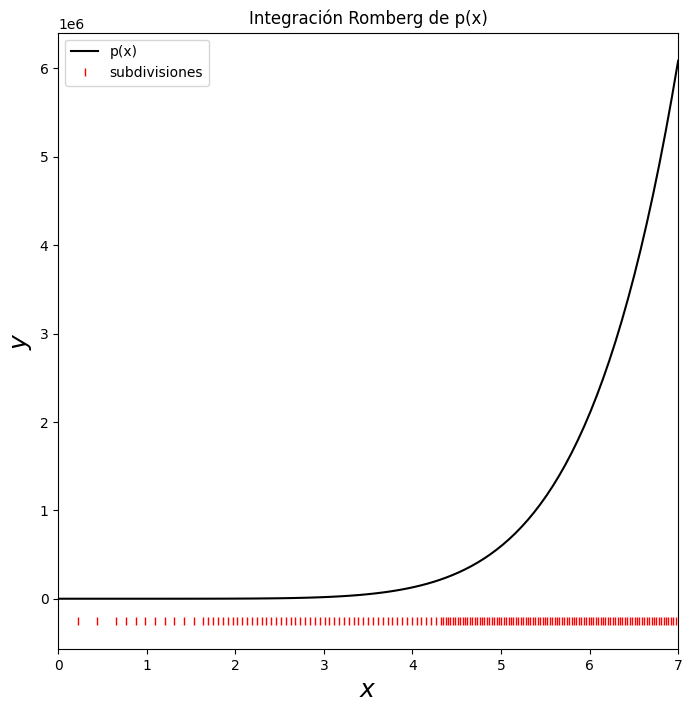

In [404]:
nxx = 100
xx = np.linspace(float(a),float(b),nxx)
yy = p(xx)
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(xx,yy,'k',label='p(x)')
for subd in subdivisiones:
    ax.plot(subd,-12**5,'r|')
ax.plot(-1,0,'r|', label='subdivisiones')
ax.legend(loc='upper left')
ax.set_xlim([a,b])
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('Integración Romberg de p(x)');

Vemos el error de la aproximación por integración adaptativa

In [405]:
error_adaptativa = abs(valor_exacto - valor_aproximado)
error_adaptativa

0.000199892558157444

Lo comparamos con el error de la aproximación por integración Romberg y vemos que con Romberg es menor

In [406]:
error_romberg < error_adaptativa

True